In [131]:
import numpy as np

In [132]:
import matplotlib.pyplot as plt

In [133]:
#parametres 

tx=1
ty=1
tz=1
gamma=0.5
a=1
N1=15
N2=10
N3=18



In [134]:
#edge case arrays

nolefty=[]

for i in range (N3):
    for j in range (N1):
        nolefty.append(i*N2+j*N2*N3)
norighty=[]

for i in range (N3):
    for j in range (N1):
        norighty.append((i+1)*N2-1+j*N2*N3)

notopx=[]

for i in range (N2*N3):
    notopx.append(i)

nobottomx=[]

for i in range (N2*N3):
    nobottomx.append(N2*N3*(N1-1)+i)

nobackz=[]

for i in range (N2):
    for j in range (N1):
        nobackz.append(i+j*N2*N3)

nofrontz=[]

for i in range (N2):
    for j in range (N1):
        nofrontz.append(N2*(N3-1)+i+j*N2*N3)
        



In [135]:
# matrix elements for us 

m1H1=(2+gamma)*tz
m2H2= -1*(2+gamma)*tz

m1H2=0
m2H1=0

m1axH1=-1*(tz)/2
m1_axH1=-1*(tz)/2
m1ayH1=-1*(tz)/2
m1_ayH1=-1*(tz)/2
m1azH1=-1*(tz)/2
m1_azH1=-1*(tz)/2

m2axH2=(tz)/2
m2_axH2=(tz)/2
m2ayH2=(tz)/2
m2_ayH2=(tz)/2
m2azH2=(tz)/2
m2_azH2=(tz)/2

m1axH2=-1j*(tx)/2
m1_axH2=1j*(tx)/2
m1ayH2=-1*(ty)/2
m1_ayH2=(ty)/2
m1azH2=0
m1_azH2=0

m2axH1=-1j*(tx)/2
m2_axH1=1j*(tx)/2
m2ayH1=(ty)/2
m2_ayH1=-1*(ty)/2
m2azH1=0
m2_azH1=0



In [136]:
# filling up hamiltonian matrix 
H=np.zeros((2*N1*N2*N3,2*N1*N2*N3),dtype=np.complex_)


In [137]:
for m in range (N1*N2*N3):
    H[2*m][2*m]=m1H1
    H[2*m][2*m+1]=m1H2
    H[2*m+1][2*m+1]=m2H2
    H[2*m+1][2*m]=m2H1
    if m not in nolefty:
        H[2*m][2*m-2]= m1ayH1
        H[2*m][2*m-1]=m1ayH2
        H[2*m+1][2*m-1]= m2ayH2
        H[2*m+1][2*m-2]=m2ayH1
    if m not in norighty:
        H[2*m][2*m+2]=m1_ayH1
        H[2*m][2*m+3]=m1_ayH2
        H[2*m+1][2*m+3]=m2_ayH2
        H[2*m+1][2*m+2]=m2_ayH1

    if m not in notopx:
        H[2*m][2*m-2*N2*N3]= m1_axH1
        H[2*m][2*m-2*N2*N3+1]= m1_axH2
        H[2*m+1][2*m-2*N2*N3+1]= m2_axH2
        H[2*m+1][2*m-2*N2*N3]= m2_axH1

    if m not in nobottomx:
        H[2*m][2*m+2*N2*N3]= m1axH1
        H[2*m][2*m+2*N2*N3+1]= m1axH2
        H[2*m+1][2*m+2*N2*N3+1]= m2axH2
        H[2*m+1][2*m+2*N2*N3]= m2axH1


    if m not in nobackz:
        H[2*m][2*m-2*N2]= m1azH1
        H[2*m][2*m-2*N2+1]= m1azH2
        H[2*m+1][2*m-2*N2+1]= m2azH2
        H[2*m+1][2*m-2*N2]= m2azH1 

    if m not in nofrontz:
        H[2*m][2*m+2*N2]= m1_azH1
        H[2*m][2*m+2*N2+1]= m1_azH2
        H[2*m+1][2*m+2*N2+1]= m2_azH2
        H[2*m+1][2*m+2*N2]= m2_azH1
#we now apply periodic boundary conditions in y 
    if m in nolefty:
        H[2*m][2*m+2*(N2-1)]= m1ayH1
        H[2*m][2*m+2*(N2-1)+1]=m1ayH2
        H[2*m+1][2*m+2*(N2-1)+1]= m2ayH2
        H[2*m+1][2*m+2*(N2-1)]=m2ayH1

    if m in norighty:
        H[2*m][2*m-2*(N2-1)]= m1_ayH1
        H[2*m][2*m-2*(N2-1)+1]=m1_ayH2
        H[2*m+1][2*m-2*(N2-1)+1]= m2_ayH2
        H[2*m+1][2*m-2*(N2-1)]=m2_ayH1

#z direction

    if m  in nobackz:
        H[2*m][2*m+2*N2*(N3-1)]= m1azH1
        H[2*m][2*m+2*N2*(N3-1)+1]= m1azH2
        H[2*m+1][2*m+2*N2*(N3-1)+1]= m2azH2
        H[2*m+1][2*m+2*N2*(N3-1)]= m2azH1 

    if m  in nofrontz:
        H[2*m][2*m-2*N2*(N3-1)]= m1_azH1
        H[2*m][2*m-2*N2*(N3-1)+1]= m1_azH2
        H[2*m+1][2*m-2*N2*(N3-1)+1]= m2_azH2
        H[2*m+1][2*m-2*N2*(N3-1)]= m2_azH1 

#we remove the PBD in the x direction







  
        
        


        
        


    





In [138]:

K1=np.arange(-np.pi/a, np.pi/a, 2*np.pi/(a*N1))
K2=np.arange(-np.pi/a, np.pi/a, 2*np.pi/(a*N2))
K3=np.arange(-np.pi/a, np.pi/a, 2*np.pi/(a*N3))

In [139]:
analenergies=[]

for k1 in K1:
    for k2 in K2:
        for k3 in K3:
            analenergies.append(np.sqrt( (tz*(2+gamma-np.cos(k1*a)-np.cos(k2*a)-np.cos(k3*a)))**2+ (tx*np.sin(k1*a))**2+(ty*np.sin(k2*a))**2))

In [140]:
energyarray=np.array(analenergies)

In [141]:
energyarray

array([5.5       , 5.43969262, 5.26604444, ..., 4.77635031, 5.03955603,
       5.21150685])

In [142]:
analyticenergies=energyarray[np.argsort(np.abs(energyarray))]
import pandas as pd 
df1 = pd.DataFrame({'Analytic Energies':analyticenergies})
pd.set_option("display.max_rows", None)
df1

,Analytic Energies
0,0.209057
1,0.209057
2,0.209057
3,0.209057
4,0.320713
5,0.320713
6,0.320713
7,0.320713
8,0.405553
9,0.405553


In [143]:
H

array([[ 2.5+0.j,  0. +0.j, -0.5+0.j, ...,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j, -2.5+0.j, -0.5+0.j, ...,  0. +0.j,  0. +0.j,  0. +0.j],
       [-0.5+0.j, -0.5+0.j,  2.5+0.j, ...,  0. +0.j,  0. +0.j,  0. +0.j],
       ...,
       [ 0. +0.j,  0. +0.j,  0. +0.j, ..., -2.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, ..., -0.5+0.j,  2.5+0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, ...,  0.5+0.j,  0. +0.j, -2.5+0.j]])

In [144]:

energies, eigenvecs = np.linalg.eigh(H)
        

In [145]:
sortenergies=energies[np.argsort(np.abs(energies))]
import pandas as pd 
df2 = pd.DataFrame({'Energies':sortenergies})
pd.set_option("display.max_rows", None)
df2

,Energies
0,-0.000023
1,0.000023
2,0.000116
3,-0.000116
4,-0.000116
5,0.000116
6,0.004460
7,-0.004460
8,0.004460
9,-0.004460


In [146]:
indices=np.argsort(np.abs(energies))

In [147]:
# We try to construct an array whose rows are the corresponding eigenvectors

wfunctionarray=np.zeros((2*N1*N2*N3,2*N1*N2*N3),dtype=np.complex_)
for i in range (2*N1*N2*N3):
    for j in range (2*N1*N2*N3):
        wfunction=eigenvecs[:, indices[i]]
        wfunctionarray[i][j]= wfunction[j]

    
    

In [148]:
wfunctionarray[0,:]

array([ 3.22733841e-02+0.00000000e+00j,  1.24900090e-16-3.22763390e-02j,
        3.22733841e-02-2.35898882e-17j, ...,
        1.18498105e-13-3.22763390e-02j, -3.22733841e-02-1.18527121e-13j,
        1.18645567e-13-3.22763390e-02j])

In [281]:
df4 = pd.DataFrame({'First wave function':wfunctionarray[4,:]})
pd.set_option("display.max_rows", None)
df4

,First wave function
0,-7.595917e-05+0.000000e+ 00j
1,8.681749e-17+7.599051e- 05j
2,-7.595917e-05-1.269183e- 17j
3,1.053819e-17+7.599051e- 05j
4,-7.595917e-05-5.657335e- 17j
5,-1.919874e-16+7.599051e- 05j
6,-7.595917e-05-2.490679e- 17j
7,-2.049988e-16+7.599051e- 05j
8,-7.595917e-05-1.164672e- 16j
9,-2.458150e-16+7.599051e- 05j


In [309]:
state1= wfunctionarray[10,:]
decay=np.zeros(N1)
for l in range (N1):
    sum2=0
    sum4=0
    for i in range (2*N2*N3):
        sum2= sum2+(np.abs(state1[i+ 2*l*N2*N3]))**2
        sum4=sum4+(np.abs(state1[i+ 2*l*N2*N3]))**4

    decay[l]=sum4/sum2


        
    



    

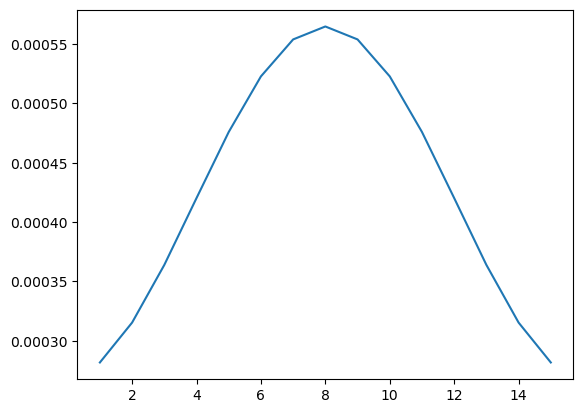

In [311]:
index=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.plot(index,decay)

In [247]:
y=np.arange(1,N2+1,1)

In [249]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [251]:
z=np.arange(1,N3+1,1)

In [253]:
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [255]:
Y,Z=np.meshgrid(y,z)

In [230]:
Z

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
       [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]])

In [265]:
def toplayer(y,z):
    place=N2*(z-1)+(y-1)
    fsum=0
    for i in range (10):
       state=wfunctionarray[i,:]
       fsum=fsum+np.abs(state[2*place])**2+np.abs(state[2*place+1])**2

    return fsum
    
       


In [277]:
toplayer(1,10)

0.0169207426567271

In [269]:
fourier= toplayer(Y,Z)

In [271]:
fourier

array([[0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074,
        0.01692074, 0.01692074, 0.01692074, 0.01692074, 0.01692074],
       [0.01692074, 0.01692074, 0.0169207